In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [3]:
dl = 1

In [4]:
h = 0.7

(-2.0, 2.0)

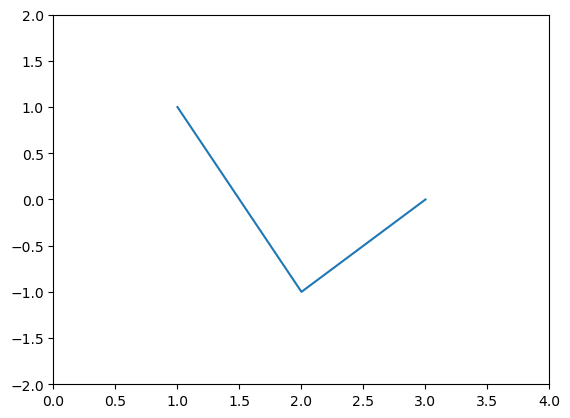

In [40]:
# learn ax plot
fig, ax=plt.subplots(1)
ax.plot([1,2,3],[1,-1,0])
ax.set_xlim(0,4)
ax.set_ylim(-2,2)

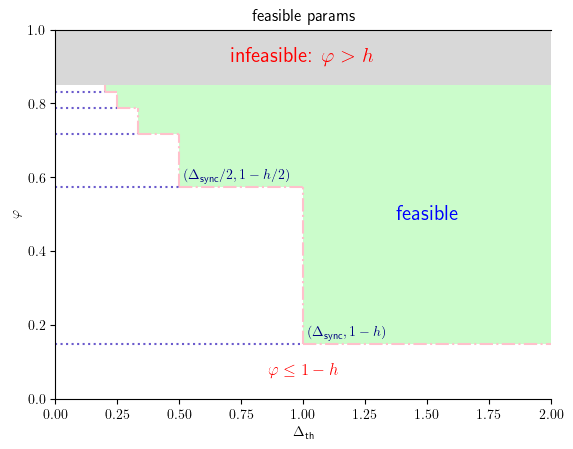

In [94]:
h=0.85
plt.rcParams['text.usetex']=True
plt.rcParams['font.family'] = "sans-serif"
fig, ax = plt.subplots(1)

ax.set_xlabel(r"$\Delta_{\mathsf{th}}$")
ax.set_ylabel(r"$\varphi$")
max_dl = dl*2
ax.set_xlim(0, max_dl)
ax.set_ylim(0,1)
ax.spines['right'].set_visible(False)

c = 'pink'

split_c = 'slateblue'

fc = 'palegreen'
box_alpha = 0.5

ax.plot([dl, max_dl],[1-h, 1-h], color=c, linestyle='dashdot')
ax.plot([dl, dl],[1-h, 1-h/2], color=c, linestyle='dashdot')
box = [Rectangle([dl, 1-h], max_dl-dl, h-(1-h))]

ax.plot([0, dl], [1-h,1-h], color=split_c, linestyle='dotted')

for i in range(1, 100):
    if 1-h/(i+1)>h: 
        break
    h_lim = 1-h/(i+2) if (1-h/(i+2))<h else h
    ax.plot([dl/(i+1), dl/i],[1-h/(i+1), 1-h/(i+1)], color=c, linestyle='dashdot')
    ax.plot([dl/(i+1), dl/(i+1)],[1-h/(i+1), h_lim], color=c, linestyle='dashdot')
    box.append(Rectangle([dl/(i+1), 1-h/(i+1)], dl/i-dl/(i+1), h - (1-h/(i+1))))
    
    ax.plot([0, dl/(i+1)], [1-h/(i+1),1-h/(i+1)], color=split_c, linestyle='dotted')
    

ax.add_collection(PatchCollection([Rectangle([0, h], max_dl, 1-h)],
                                 facecolor='gray', alpha=0.3, edgecolor='none'))
ax.text(max_dl/2, 1/2+h/2, r'infeasible: $\varphi>h$', horizontalalignment='center',
     verticalalignment='center', fontsize=15, color='red')

pc = PatchCollection(box, facecolor=fc, alpha=box_alpha, edgecolor='none')
ax.add_collection(pc)
ax.set_title("feasible params")

ax.text(dl, (1-h)/2, r'$\varphi \le 1-h$', horizontalalignment='center',
     verticalalignment='center', fontsize=12, color='red')
ax.text(1.5, 0.5, 'feasible', horizontalalignment='center',
     verticalalignment='center', fontsize=15, color='blue')
ax.text(dl+0.02, 1-h+0.02, r'$(\Delta_{\mathsf{sync}}, 1-h)$', color='navy')
ax.text(dl/2+0.02, 1-h/2+0.02, r'$(\Delta_{\mathsf{sync}}/2, 1-h/2)$', color='navy')
fig.savefig("param%s.pdf"%(100*h), format='pdf', dpi=300)